# Resolviendo la Placa de Kirchhoff-Love

Si tenemos un rectángulo con bordes fijos, su ecuación está dada por:

$$
\frac{\partial^4 w}{\partial x^4} + 2\frac{\partial^4 w}{\partial x^2 \partial y^2} + \frac{\partial^4 w}{\partial y^4} = \frac{q(x,y)}{D(x,y)}
$$

Con condiciones de frontera:

$$
w(x) = 0 \quad \text{y} \quad \frac{\partial^2 w}{\partial x^2} = \frac{\partial^2 w}{\partial y^2} = 0, \quad \text{en } \partial\Omega
$$

Aquí, \( w \) es el campo de desplazamientos, \( q \) es la carga, y \( D \) está asociado a las propiedades del material de la placa.

El primer paso es reescribir la ecuación. Para ello, usamos:

$$
\Delta w = \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2}
$$

(el Laplaciano de \( w \)), y por lo tanto:

$$
\Delta^2 w = \Delta(\Delta w) = \Delta\left( \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2} \right) = \frac{\partial^4 w}{\partial x^4} + 2\frac{\partial^4 w}{\partial x^2 \partial y^2} + \frac{\partial^4 w}{\partial y^4}
$$

Entonces, la ecuación se convierte en:

$$
\Delta^2 w = \frac{q}{D}
$$

## Formulación Débil

Como es habitual, multiplicamos por \( v \) e integramos:

$$
\int_\Omega (\Delta^2 w) v \, dx = \int_\Omega \frac{q}{D} v \, dx
$$

Definimos \( u = \Delta w \) y aplicamos integración por partes al primer término:

$$
\int_\Omega (\Delta^2 w) v \, dx = \int_\Omega (\Delta u) v \, dx
$$

Para ello, utilizamos una proposición del libro de Franz:

**Proposición 2.2 (p. 19):**

$$
\int_\Omega (\Delta u)v = \int_{\partial\Omega} (\nabla u \cdot n)v - \int_\Omega \nabla u \cdot \nabla v
$$

Entonces tenemos:

$$
\int_\Omega (\Delta^2 w) v \, dx = \int_\Omega (\Delta u) v \, dx = -\int_\Omega \nabla u \cdot \nabla v
$$

ya que el primer término es cero porque \( v = 0 \) en \( \partial\Omega \), como está definido para \( w \).

Así que utilizamos la formulación mixta:

$$
\left\{
\begin{aligned}
u &= \Delta w \\
\Delta u &= \frac{q}{D}
\end{aligned}
\right.
$$

con \( u = w = 0 \) en \( \partial\Omega \).

Procedemos entonces a derivar las formulaciones débiles, y utilizando la proposición anterior, obtenemos:

$$
\left\{
\begin{aligned}
\int_\Omega u v_1 &= -\int_\Omega \nabla w \cdot \nabla v_1 \\
-\int_\Omega \nabla u \cdot \nabla v_2 &= \int_\Omega \frac{q}{D} v_2
\end{aligned}
\right.
$$

Así que, si sumamos estas ecuaciones, obtenemos la formulación débil:

$$
\int_\Omega u v_1 + \int_\Omega \nabla w \cdot \nabla v_1 - \int_\Omega \nabla u \cdot \nabla v_2 = \int_\Omega \frac{q}{D} v_2
$$

Con condiciones de frontera de Dirichlet: \( u = w = 0 \) en \( \partial\Omega \).


# Importación de bibliotecas

* fenics (dolfin): contiene el código para resolver MEF
* rbnics: biblioteca que utiliza fenics e implementa bases reducidas
* numpy: operaciones con arrays de python
* matplotlib: para gráficos
* time: estudiar tiempo de demora

In [1]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh";
    from dolfin import *

--2025-05-29 14:44:23--  https://fem-on-colab.github.io/releases/fenics-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.108.153, 185.199.111.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4180 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.08K  --.-KB/s    in 0s      

2025-05-29 14:44:23 (49.4 MB/s) - ‘/tmp/fenics-install.sh’ saved [4180/4180]

+ INSTALL_PREFIX=/usr/local
++ awk -F/ '{print NF-1}'
++ echo /usr/local
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/a51d633e/releases/pybi

In [2]:
# Install RBniCS
try:
    import rbnics
except ImportError:
    !pip3 install git+https://github.com/RBniCS/RBniCS.git
    import rbnics
import rbnics.utils.config
assert "dolfin" in rbnics.utils.config.config.get("backends", "required backends")
from rbnics import *

  Cloning https://github.com/RBniCS/RBniCS.git to /tmp/pip-req-build-m3wc8cfj
  Running command git clone --filter=blob:none --quiet https://github.com/RBniCS/RBniCS.git /tmp/pip-req-build-m3wc8cfj
  Resolved https://github.com/RBniCS/RBniCS.git to commit b23d20d68d22579c0995b16025f7f1e858d65259
  Preparing metadata (setup.py) ... done
  Created wheel for RBniCS: filename=RBniCS-0.2.0-py3-none-any.whl size=598339 sha256=7d6810817e15bc771bbb7b6b96f94ff158412485d7f2e3c7cb1ffb4fbae5440a
  Stored in directory: /tmp/pip-ephem-wheel-cache-t0lbxzk5/wheels/91/6e/53/8e8074380bbeb5ca55786b492fcb71afa192955accca0a7cea
Successfully built RBniCS


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Definición de la losa

In [4]:

# Parámetros del dominio
Lx, Ly = 50.0, 50.0  # Tamaño del cuadrado
nx, ny = 167, 167    # Número de divisiones de la malla

# Crear la malla del cuadrado
mesh = RectangleMesh(Point(0.0, 0.0), Point(Lx, Ly), nx, ny)

# Crear funciones para subdominios y fronteras
subdomains = MeshFunction("size_t", mesh, mesh.topology().dim())
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
subdomains.set_all(0)
boundaries.set_all(0)

# Marcar subcuadrados (2x2): dividimos el cuadrado en 4
for cell in cells(mesh):
    x, y = cell.midpoint().x(), cell.midpoint().y()
    if x <= Lx/2 and y <= Ly/2:
        subdomains[cell] = 1  # abajo izquierda
    elif x > Lx/2 and y <= Ly/2:
        subdomains[cell] = 2  # abajo derecha
    elif x <= Lx/2 and y > Ly/2:
        subdomains[cell] = 3  # arriba izquierda
    else:
        subdomains[cell] = 4  # arriba derecha

# Marcar fronteras
class LeftBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[0], 0.0)

class RightBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[0], Lx)

class BottomBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], 0.0)

class TopBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], Ly)

# Instanciar y marcar
left = LeftBoundary()
right = RightBoundary()
bottom = BottomBoundary()
top = TopBoundary()

left.mark(boundaries, 1)
right.mark(boundaries, 2)
bottom.mark(boundaries, 3)
top.mark(boundaries, 4)

# Espacio de elementos finitos mixto
V = FiniteElement("P", mesh.ufl_cell(), 1)
W = FiniteElement("P", mesh.ufl_cell(), 1)
M = FunctionSpace(mesh, MixedElement([V, W]))

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_022704741ebac5cb750a821aa28214a1b9170095

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00420618 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.302887 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00206208 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00903821 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representat

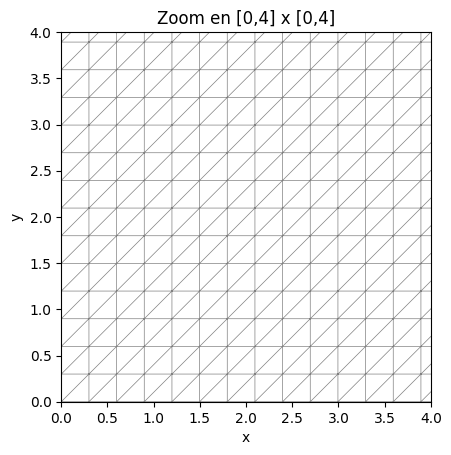

Número de triángulos:  55778
Número de vértices:  28224
Número de nodos:  56448


In [ ]:
# Graficar el mallado completo
plot(mesh, linewidth=0.5)

# Ajustar los límites de la vista para mostrar solo [0,4]x[0,4]
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.gca().set_aspect('equal')  # Mantener proporción 1:1
plt.title("Zoom en [0,4] x [0,4]")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print("Número de triángulos: ", mesh.num_cells())
print("Número de vértices: ", mesh.num_vertices())
print("Número de nodos: ", M.dim())

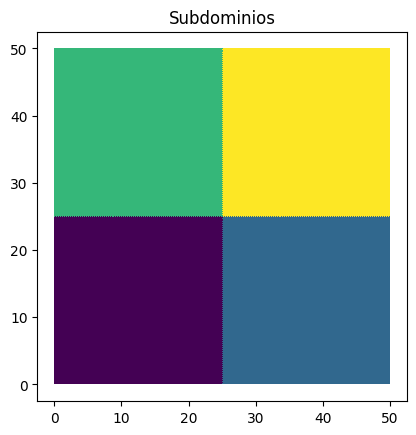

In [ ]:
plot(subdomains, title="Subdominios")

# Definiendo el problema

Definimos una clase que hereda las porpiedades de EllipticCoerciveProblem (clase de rbnics)

In [5]:
class Kirchhoff_plate3(EllipticCoerciveProblem):

    # Inicialización
    def __init__(self, M, **kwargs):
        EllipticCoerciveProblem.__init__(self, M, **kwargs)
        # Datos de FEniCS
        assert "subdomains" in kwargs
        assert "boundaries" in kwargs
        self.subdomains, self.boundaries = kwargs["subdomains"], kwargs["boundaries"]
        self.u, self.w = TrialFunction(M)
        self.v2, self.v1 = TestFunction(M)
        self.dx = Measure("dx")(subdomain_data=self.subdomains)
        self.ds = Measure("ds")(subdomain_data=self.boundaries)
        # Propiedades físicas
        self.B = 2.747252747e9
        self.M = M

    # Nombre del problema
    def name(self):
        return "Kirchhoff_plate3"

    # Términos theta para la expansión afín
    def compute_theta(self, term):
        mu = self.mu
        if term == "a":
            theta_a0 = 1  # Solo un término para la rigidez
            return (theta_a0,)
        elif term == "f":
            theta_f0 = mu[0]*10**4/(mu[4]**3)  # q1
            theta_f1 = mu[1]*10**4/(mu[4]**3)  # q2
            theta_f2 = mu[2]*10**4/(mu[4]**3)  # q3
            theta_f3 = mu[3]*10**4/(mu[4]**3)  # q4
            return (theta_f0, theta_f1, theta_f2, theta_f3)
        else:
            raise ValueError("Invalid term for compute_theta().")

    # Ensamblaje de operadores
    def assemble_operator(self, term):
        v1 = self.v1
        v2 = self.v2
        dx = self.dx
        B = self.B
        if term == "a":
            u = self.u
            w = self.w
            a0 = u*v1*dx + inner(grad(w),grad(v1))*dx - inner(grad(u),grad(v2))*dx
            return (a0,)
        elif term == "f":
            # Definir carga por tramos
            f0 = v2/B * dx(1) # Primer
            f1 = v2/B * dx(2) # Segundo
            f2 = v2/B * dx(3) # Tercer
            f3 = v2/B * dx(4) # Cuarto
            return (f0, f1, f2, f3)
        elif term == "dirichlet_bc":
            bc0 = [DirichletBC(self.M.sub(0), Constant(0.0), self.boundaries, 1),  # u(0) = 0
                   DirichletBC(self.M.sub(0), Constant(0.0), self.boundaries, 2),  # u(1) = 0
                   DirichletBC(self.M.sub(0), Constant(0.0), self.boundaries, 3),  # u(2) = 0
                   DirichletBC(self.M.sub(0), Constant(0.0), self.boundaries, 4),  # u(3) = 0
                   DirichletBC(self.M.sub(1), Constant(0.0), self.boundaries, 1),  # w(0) = 0
                   DirichletBC(self.M.sub(1), Constant(0.0), self.boundaries, 2),  # w(1) = 0
                   DirichletBC(self.M.sub(1), Constant(0.0), self.boundaries, 3),  # w(2) = 0
                   DirichletBC(self.M.sub(1), Constant(0.0), self.boundaries, 4)]
            return (bc0,)
        elif term == "inner_product":
            u = self.u
            w = self.w
            x0 = inner(u, v2) * dx + inner(grad(u), grad(v2)) * dx + inner(w, v1) * dx + inner(grad(w), grad(v1)) * dx
            return (x0,)
        else:
            raise ValueError("Invalid term for assemble_operator().")

In [6]:
# Crear problema
problem2 = Kirchhoff_plate3(M, subdomains=subdomains, boundaries=boundaries)
mu_range = [(-10,10) for i in range(4)] + [(0.04,0.6)] # Rango de q1, q2, q3, q4 y el espesor
problem2.set_mu_range(mu_range)

In [7]:
# Etapa Offline: Método de reducción POD-Galerkin
reduction_method2 = PODGalerkin(problem2)
reduction_method2.set_Nmax(15)  # Máximo de funciones en la base
reduction_method2.set_tolerance(0.0000001)  # Tolerancia

# Generar conjunto de entrenamiento
reduction_method2.initialize_training_set(100)

start_time = time.time()
reduced_problem2 = reduction_method2.offline();
print("Etapa offline completada.")
# --------------------------------

end_time = time.time()

# Mostrar el tiempo total
print(f"Tiempo total: {end_time - start_time:.2f} segundos")

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_691c42fa0a0817ab48328b90dfa17c0e42843463

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>, CG1(?
                             ,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.149434 seconds.

INFO:FFC:Compiler stage 2: Com

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_c8200760ff7ba9a9e86a2b7f8555ff38fb61d8ec

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00435114 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0684867 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3142d14591a69ae8a843853a55af6e9149fc9f3e

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00359797 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0427032 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_02408bfcd9b1979fed57bdec2d29753994b7e4c5

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0032773 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0145745 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_5dfbb7d6385c0bc8c968e61fc70db68456ade8e7

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00283337 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0229523 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_e57f86a04e21445aab19cfdd4c8c812f3165093e

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 2
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>, CG1(?
                             ,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.015465 seconds.

INFO:FFC:Compiler stage 2: Computin

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_054e6793878bcb9953bfaef02a66205cfb0f0d5c

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 3
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>, CG1(?
                             ,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0381172 seconds.

INFO:FFC:Compiler stage 2: Computi

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_a29d12b33cfc13986ccb4c4a3eba8a22b3bcf140

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 4
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>, CG1(?
                             ,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0348716 seconds.

INFO:FFC:Compiler stage 2: Computi

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_dc37b0563973abfd62fb8f9695b5eef11d21a01f

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 5
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>, CG1(?
                             ,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0522006 seconds.

INFO:FFC:Compiler stage 2: Computi

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ae8599740e88bfeec09392c34851d39f80fee4d7

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Mixed<CG1(?,?), CG1(?,?)>, Vector<2 x CG1(?,?)>, CG1(?
                             ,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.07476 seconds.

INFO:FFC:Compiler stage 2: Comp

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ca26299b2b11f979027d9b758f4afeca0bfaf22a

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0458832 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_88909014e5429e2578d338a011ffd956bc5c7cb7

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_43]'
  Unique elements:           'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.019453 seconds.

INFO:FFC:Compiler stage 2: 

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_57b2d046702a951357e83418ce8e636842a8edc4

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00316954 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0143518 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

=              Kirchhoff_plate3 POD-Galerkin offline phase begins              =

###################################### 0 #######################################
truth solve for mu = (-0.5774918199430203, 7.098519610846253, -9.032408672886028, 9.885995191640522, 0.09201272954505141)
update snapshots matrix

###################################### 1 #######################################
truth solve for mu = (-7.64642705605139, -0.04292718184899158, 2.207341651085226, -4.725373700058073, 0.21022920156063335)
update snapshots matrix

###################################### 2 #######################################
truth solve for mu = (-5.444425812646301, -7.431407676611103, 2.5801269166594984, -3.683682914651259, 0.09931756177903103)
update snapshots matrix

###################################### 3 #######################################
truth solve for mu = (-7.290147190427123, 2.8200584815748577, 0.2222408740853794, 0.585771825916936, 0.41567984106655564)
update snapshots matrix

####

## Para ver como quedo la base reducida

In [ ]:
# Acceder a las funciones de base reducida
basis_functions = reduced_problem2.basis_functions

# Obtener las dimensiones
n_dofs = M.dim()  # Número de grados de libertad en el espacio completo
#Si el polinomio a interpolar es de grado 1 es el doble de la cantidad de nodos ya que cada nodo se puede mover en 2 ejes x e y
n_basis = len(basis_functions)  # Número de funciones en la base reducida

# Crear una matriz vacía con NumPy
basis_matrix = np.zeros((n_dofs, n_basis))

# Llenar la matriz con los vectores de las funciones de base
for i, basis_func in enumerate(basis_functions):
    basis_vector = basis_func.vector().get_local()  # Convertir a un array NumPy
    basis_matrix[:, i] = basis_vector

# Imprimir información sobre la matriz
print(f"Dimensiones de la matriz de la base reducida: {basis_matrix.shape}")
print(f"Matriz de la base reducida:")
print(basis_matrix[:, :])

## Cuantos 0 hay?
print("Cantidad de 0s:", np.count_nonzero(basis_matrix< 1e-12))

Dimensiones de la matriz de la base reducida: (56448, 4)
Matriz de la base reducida:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Cantidad de 0s: 115195


Tiempo total: 0.01 segundos


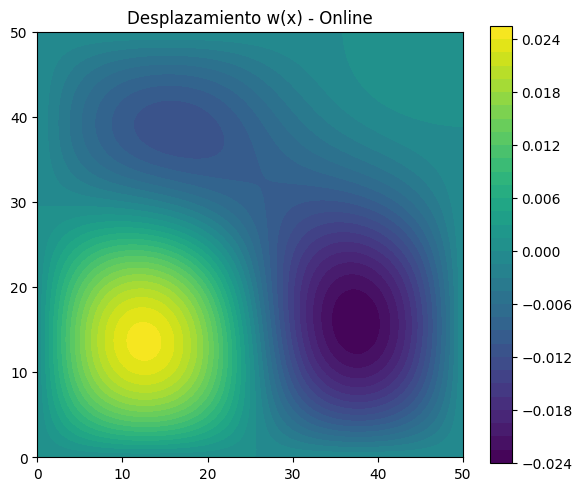

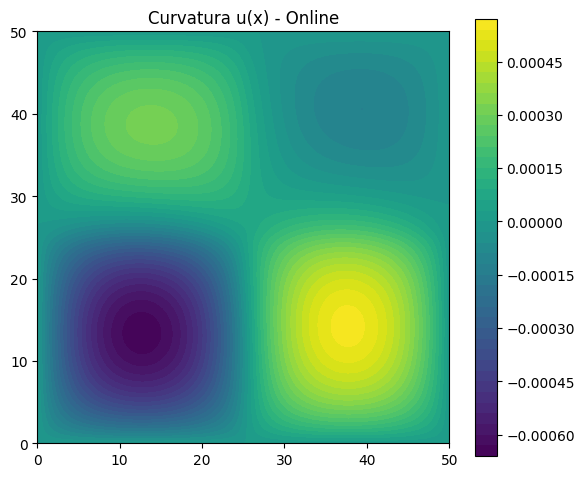

In [8]:
start_time = time.time()

# Etapa Online: Resolver para nuevos parámetros
#online_mu = (4, -5, -0.5, 0.2, 0.3)
online_mu = (0.6274, -0.5280, -0.3368, 0.1946, 0.5603)
reduced_problem2.set_mu(online_mu)
reduced_solution2 = reduced_problem2.solve()

# Reconstruir la solución en el espacio completo
full_solution2 = reduced_problem2.basis_functions * reduced_solution2  # Producto matricial con las bases
u, w = full_solution2.split()  # Ahora sí podemos dividir

end_time = time.time()

# Mostrar el tiempo total
print(f"Tiempo total: {end_time - start_time:.2f} segundos")


# Create the figure and axis
plt.figure(figsize=(6, 5))
plot_obj=plot(w, title="Desplazamiento w(x) - Online")
# Add colorbar
plt.colorbar(plot_obj)
# Show the figure
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plot_obj=plot(u, title="Curvatura u(x) - Online")
# Add colorbar
plt.colorbar(plot_obj)
# Show the figure
plt.tight_layout()
plt.show()

## Para ver los multiplicadores

In [ ]:
print(reduced_solution2)

[-27.62383926  16.3289435  -25.5723003   13.6892651 ]


# Comparación

Tener en cuenta que la comparación es muy a ojo. AGE no dice valores exactos fuera de los vértices del mallado

In [ ]:
print(w(25,25)) #En AGE -1.115
print(w(10,40)) #En AGE -0.13
print(w(40,10)) #En AGE -1.64
print(w(10,10)) #En AGE 0.70
print(w(40,40)) #En AGE -0.58

-1.1118281697366075
-0.12770161197606386
-1.640400705314183
0.6998342352672868
-0.5776919825431868


# Analisis de tiempo



 AGE:
 * ss6: 8.82s
 * ss7: 1.3s
 * total: 10.12s


 RBniCS:
 * Offline: 155.47s
 * Online: 0.03s


 Estos resultados son muy positivos ya que solo va a haber alguien esperando en la online